In [31]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


$$
    y = \tan^{-1}(x)
$$

# Convergence in Measure
Now, we assume $\tilde{x} \sim \mathcal{N}(\mu_x, \sigma_x)$ is a random normal variable. Further, we now compute $\tilde{y}$ based on $\tilde{x}$:
$$
    \tilde{y} = \tan^{-1} (\tilde{x})
$$

In [43]:
@widgets.interact_manual(x=(-10,10,1), sigma=(1e-9,1,0.01))
def show_convergence(x=0, sigma=0.125):
    y = np.arctan(x)
    samples = 10**np.arange(8)
    y_experiments = []
    for p in samples:

        x_tilde = np.random.normal(x, sigma, p)

        y_tilde = np.arctan(x_tilde)
        y_experiments.append(y_tilde)

    plt.figure(figsize=(18,10))
    plt.subplot(2,1,1)
    plt.boxplot(y_experiments, positions=samples, widths=samples/2)
    plt.hlines(y, samples[0], samples[-1] * 3 / 2, ls='dashed', colors='k')

    plt.xscale('log')
    plt.xlim(0.5, samples[-1] * 3 / 2)
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(samples, [np.mean(i) for i in y_experiments], label=r'$\mu$')
    plt.hlines(y, samples[0], samples[-1] * 3 / 2, ls='dashed', colors='k')
    #plt.plot([np.std(i) for i in y_experiments], label=r'$\sigma$')

    plt.xscale('log')
    plt.grid()
    plt.legend()

    plt.show()

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), FloatSlider(value=0.125, descripti…

# Convergence of random variables
Now, we assume $\tilde{x} \sim \mathcal{N}(\mu_x, \sigma_x)$ is a random normal variable. Further, we now compute $\tilde{y}$ based on $\tilde{x}$, which propagates the uncertainty $\sigma_x$ into $\tilde{y}$ using error propagation:
\begin{align}
    \tilde{y}(x) &= \tilde{y} = \tan^{-1} (\tilde{x}) \\
    \sigma_y(x) &= \frac{d \tilde{y}(x)}{d \tilde{x}} \sigma_x = \frac{1}{ 1 + x^2 } \sigma_x
\end{align}

In [45]:
@widgets.interact_manual(x=(-10,10,1), sigma_x=(1e-9,1,0.1))
def show(x=0, sigma_x=0.25):
    y = np.arctan(x)
    sigma_y = 1 / (1 + x**2) * sigma_x

    samples = 10**np.arange(8)
    y_experiments = []
    sigma_experiments = []
    for p in samples:

        x_tilde = np.random.normal(x, sigma_x, p)

        y_tilde = np.arctan(x_tilde)
        sigma_y_tilde = 1 / ( 1 + x_tilde**2 ) * sigma_x
        y_experiments.append(y_tilde)
        sigma_experiments.append(sigma_y_tilde)

    plt.figure(figsize=(18,10))
    plt.subplot(2,2,1)
    plt.title(r'$\mu_y$')
    plt.boxplot(y_experiments, positions=samples, widths=samples/2)
    plt.hlines(y, samples[0], samples[-1] * 3 / 2, ls='dashed', colors='k', label='y')

    plt.xscale('log')
    plt.xlim(0.5, samples[-1] * 3 / 2)
    plt.grid()
    plt.legend()

    plt.subplot(2,2,2)
    plt.title(r'$\sigma_y$')
    plt.boxplot(sigma_experiments, positions=samples, widths=samples/2)
    plt.hlines(sigma_y, samples[0], samples[-1] * 3 / 2, ls='dashed', colors='k', label=r'$\sigma_y$')

    plt.xscale('log')
    #plt.yscale('log')
    plt.xlim(0.5, samples[-1] * 3 / 2)
    plt.grid()
    plt.legend()

    plt.subplot(2,2,3)
    plt.title(r'$\mathbb{E}[\mu_y]$ and $\mathbb{E}\left[|\mu_y - \mathbb{E}[\mu_y]|^2\right]$')
    plt.plot(samples, [np.mean(i) for i in y_experiments], label=r'$\mu$')
    plt.hlines(y, samples[0], samples[-1] * 3 / 2, ls='dashed', colors='k', label='y')
    #plt.plot([np.std(i) for i in y_experiments], label=r'$\sigma$')

    plt.xscale('log')
    plt.grid()
    plt.legend()

    plt.subplot(2,2,4)
    plt.title(r'$\mathbb{E}[\sigma_y]$ and $\mathbb{E}\left[|\sigma_y - \mathbb{E}[\sigma_y]|^2\right]$')
    plt.plot(samples, [np.mean(i) for i in sigma_experiments], label=r'$\mu$')
    plt.hlines(sigma_y, samples[0], samples[-1] * 3 / 2, ls='dashed', colors='k', label=r'$\sigma_y$')
    #plt.plot([np.std(i) for i in sigma_experiments], label=r'$\sigma$')

    plt.xscale('log')
    plt.grid()
    plt.legend()

    plt.show()

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), FloatSlider(value=0.25, descriptio…

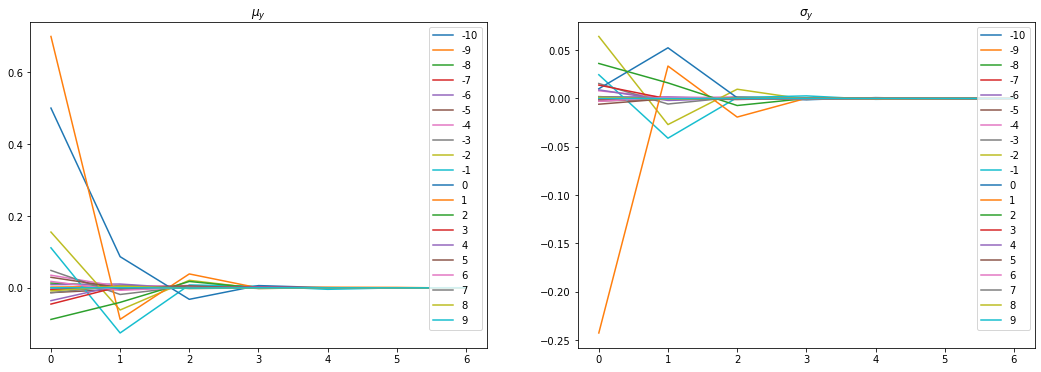

In [69]:
x_range = np.arange(-10,10)
overview = np.zeros((len(x_range),8))
overview_sigma = np.zeros((len(x_range),8))
sigma_x = 0.5
for idx,x in enumerate(x_range):
    y = np.arctan(x)
    sigma_y = 1 / (1 + x**2) * sigma_x

    samples = 10**np.arange(8)
    for jdx,p in enumerate(samples):

        x_tilde = np.random.normal(x, sigma_x, p)

        y_tilde = np.arctan(x_tilde)
        sigma_y_tilde = 1 / ( 1 + x_tilde**2 ) * sigma_x
        y_experiments.append(y_tilde)
        sigma_experiments.append(sigma_y_tilde)
    
        overview[idx,jdx] = y_tilde.mean()
        overview_sigma[idx,jdx] = sigma_y_tilde.mean()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title(r'$\mu_y$')
plt.plot(np.diff(overview).T)
plt.legend(np.arange(-10,10), loc=1)
plt.subplot(1,2,2)
plt.title(r'$\sigma_y$')
plt.plot(np.diff(overview_sigma).T)
plt.legend(np.arange(-10,10), loc=1)
plt.show()